In [1]:
print("""
@Title        : 划分画布的主要函数
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-01-18 22:08:32
@Description  : 
""")


@Title        : 划分画布的主要函数
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-01-18 22:08:32
@Description  : 



子区顾名思义就是将画布分成若干子画布，这些子画布构成绘图区域，在这些绘图区域上分别绘制图形。因此，子区的本质就是在纵横交错的行列网格中，添加绘图坐标轴。这样就实现了一张画布多张图形分区域展示的效果。这也是组织子区相关代码的逻辑顺序。

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 函数 subplot()：绘制网格区域中的几何形状相同的子区布局

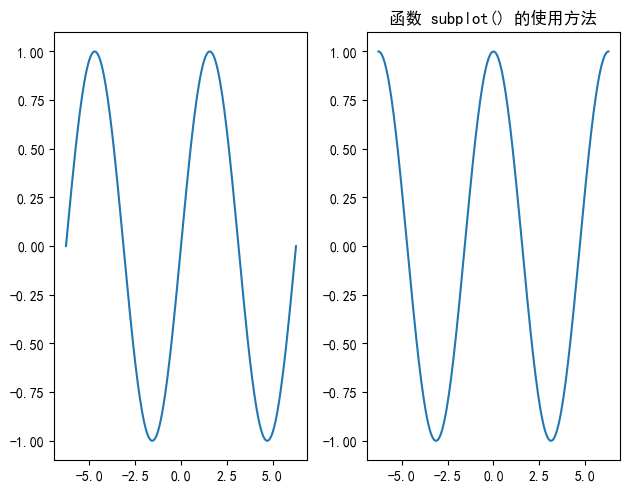

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y = np.sin(x)
y1 = np.cos(x)
plt.subplot(121)
plt.plot(x, y)

plt.subplot(122)
plt.plot(x, y1)
plt.tight_layout()
plt.title('函数 subplot() 的使用方法')
plt.show()

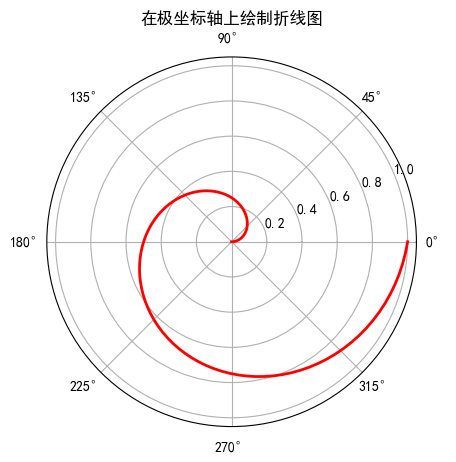

In [4]:
radii = np.linspace(0, 1, 100)
theta = 2 * np.pi * radii
ax = plt.subplot(111, polar=True)
ax.plot(theta, radii, color="r", linestyle="-", linewidth=2)
plt.title('在极坐标轴上绘制折线图')
plt.show()

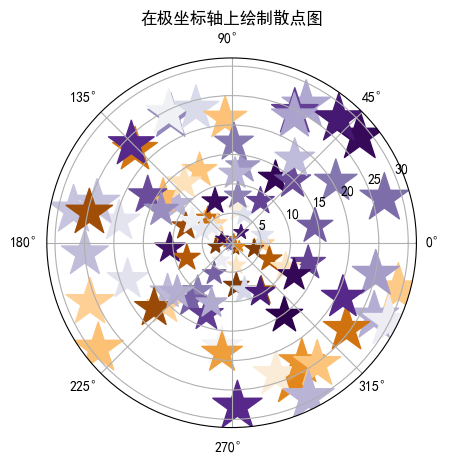

In [5]:
import matplotlib as mpl
radii = 30 * np.random.rand(100)
theta = 2 * np.pi * np.random.rand(100)
colors = np.random.rand(100)
size = 50 * radii
ax = plt.subplot(111, polar=True)
ax.scatter(theta, radii, s=size, c=colors, cmap=mpl.cm.PuOr, marker="*")
plt.title("在极坐标轴上绘制散点图")
plt.show()

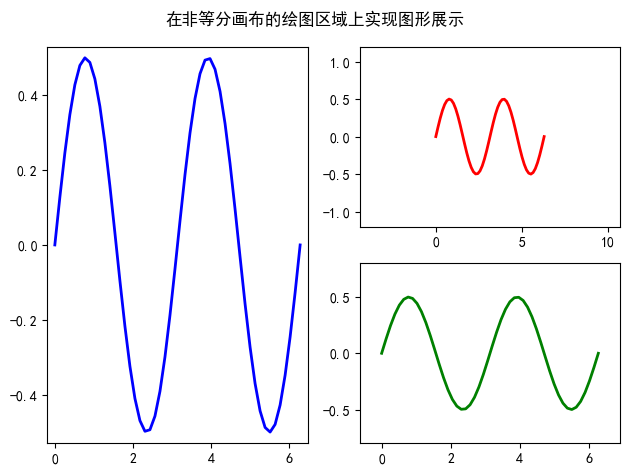

In [6]:
x = np.linspace(0.0, 2 * np.pi)
y = np.cos(x) * np.sin(x)
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.margins(0.03)
ax1.plot(x, y, ls="-", lw=2, color="b")
ax2 = fig.add_subplot(222)
ax2.margins(0.7, 0.7)
ax2.plot(x, y, ls="-", lw=2, color="r")
ax3 = fig.add_subplot(224)
ax3.margins(x=0.1, y=0.3)
ax3.plot(x, y, ls="-", lw=2, color="g")
plt.suptitle("在非等分画布的绘图区域上实现图形展示")
plt.tight_layout()
plt.show()

## 函数 subplot2grid()：让子区跨越固定的网格布局

子区函数只能绘制等分画布形式的图形样式，要想按照绘图区域的不同展示目的，进行非等分画布形式的图形展示，需要向画布多次使用子区函数 `subplot()` 完成非等分画布的展示任务，但是这么频繁地操作显得非常麻烦，而且在划分画布时易于出现疏漏和差错。因此，我们需要用高级的方法使用子区，需要定制化的网格区域，这个函数就是 `subplot2grid()`，通过使用 `subplot2grid()` 函数的 `rowspan` 和 `colspan` 参数可以让子区跨越固定的网格布局的多个行和列，实现不同的子区布局。

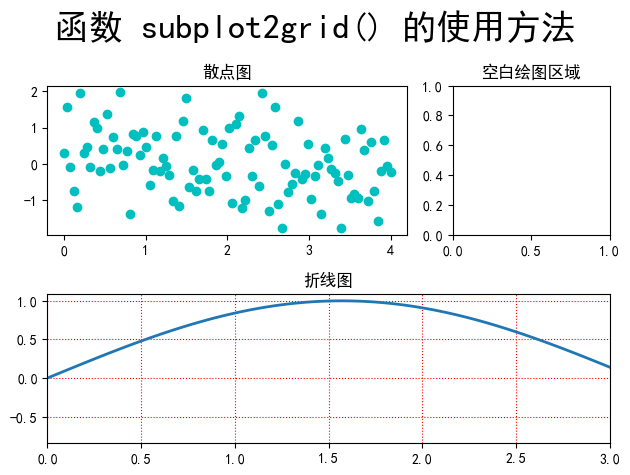

In [7]:
# subplot(23, 1-2)
plt.subplot2grid((2, 3), (0, 0), colspan=2)
x = np.linspace(0.0, 4.0, 100)
y = np.random.randn(100)
plt.scatter(x, y, c="c")
plt.title("散点图")
plt.subplot2grid((2, 3), (0, 2))
plt.title("空白绘图区域")

plt.subplot2grid((2, 3), (1, 0), colspan=3)
x = np.linspace(0.0, 4.0, 100)
y1 = np.sin(x)
plt.plot(x, y1, lw=2, ls="-")
plt.xlim(0, 3)
plt.grid(True, ls=":", c="r")
plt.title("折线图")
plt.suptitle("函数 subplot2grid() 的使用方法", fontsize=25)
plt.tight_layout()
plt.show()

调用函数 `subplot2grid(shape,loc)`，将参数 `shape` 所划定的网格布局作为绘图区域，实现 在参数 `loc` 位置处绘制图形的目的。上面的代码中，参数 `shape` 设置了一个 2 行 3 列的网格布局，参数 `loc` 表示元组的第一个和第二个数字的起点都是 0。以 `plt.subplot2grid((2,3), (0,0), colspan=2)` 语句为例，参数 `loc=(0, 0)` 就表示图形将第一行和第一列作为位置起点，跨越两列。相应的，`plt.subplot2grid((2,3),(0,2))` 语句就表示图形将第一行和第三列作为位置起点。值得注意的是，图形位置的索引起点是从 0 开始算起的，而不是像子区函数 `subplot()` 中的图形位置是从 1 开始算起的。

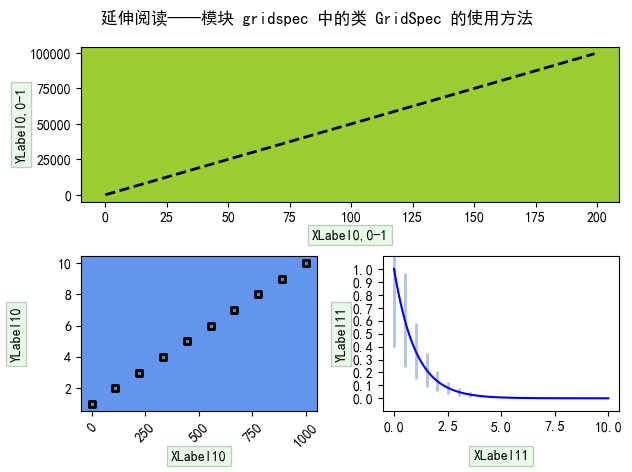

In [8]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(2, 2)
box = {"facecolor": "lightgreen", "pad": 3, "alpha": 0.2}

x1 = np.arange(0, 1e5, 500)
# 实例方法 add_subplot()的参数 gs[0,:]
# 表示将第 1 行、全部列作为子区，参数 gs 的索引是从 0 开始算起的
ax1 = fig.add_subplot(gs[0, :], facecolor="yellowgreen")
ax1.plot(x1, "k--", lw=2)
ax1.set_ylabel("YLabel0,0-1", bbox=box)
ax1.set_xlabel("XLabel0,0-1", bbox=box)
ax1.yaxis.set_label_coords(-0.1, 0.5)
x2 = np.linspace(0, 1000, 10)
y2 = np.arange(1, 11, 1)
ax2 = fig.add_subplot(gs[1, 0], facecolor="cornflowerblue")
ax2.scatter(x2, y2, s=20, c="grey", marker="s", linewidths=2, edgecolors="k")
ax2.set_ylabel("YLabel10", bbox=box)
ax2.set_xlabel("XLabel10", bbox=box)
for ticklabel in ax2.get_xticklabels():
    ticklabel.set_rotation(45)
ax2.yaxis.set_label_coords(-0.25, 0.5)
ax2.xaxis.set_label_coords(0.5, -0.25)
# fig.align_labels()
# fig.align_xlabels()
# fig.align_ylabels()

x3 = np.linspace(0, 10, 100)
y3 = np.exp(-x3)
ax3 = fig.add_subplot(gs[1, 1])
ax3.errorbar(
    x3,
    y3,
    fmt="b-",
    yerr=0.6 * y3,
    ecolor="lightsteelblue",
    elinewidth=2,
    capsize=0,
    errorevery=5,
)
ax3.set_ylabel("YLabel11", bbox=box)
ax3.set_xlabel("XLabel11", bbox=box)
ax3.xaxis.set_label_coords(0.5, -0.25)
ax3.set_ylim(-0.1, 1.1)
ax3.set_yticks(np.arange(0, 1.1, 0.1))
plt.suptitle("延伸阅读——模块 gridspec 中的类 GridSpec 的使用方法")
gs.tight_layout(fig)
plt.show()

## 函数 subplots()：创建一张画布带有多个子区的绘图模式

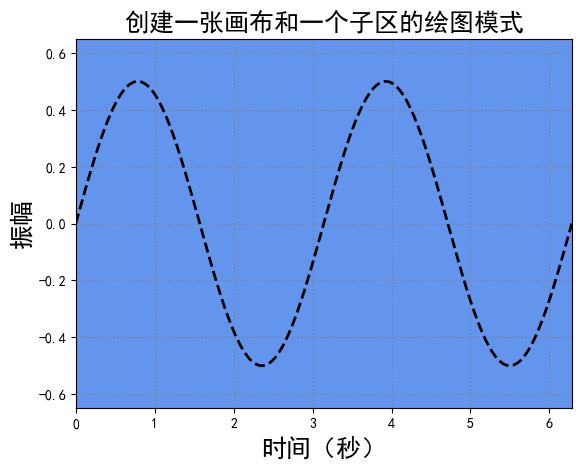

In [9]:
font_style = dict(fontsize=18, weight="black")
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x) * np.cos(x)

fig, ax = plt.subplots(1, 1, subplot_kw=dict(facecolor="cornflowerblue"))
ax.plot(x, y, "k--", lw=2)
ax.set_xlabel("时间（秒）", **font_style)
ax.set_ylabel("振幅", **font_style)
ax.set_title("创建一张画布和一个子区的绘图模式", **font_style)
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-0.65, 0.65)
ax.grid(ls=":", lw=1, color="gray", alpha=0.8)
plt.show()

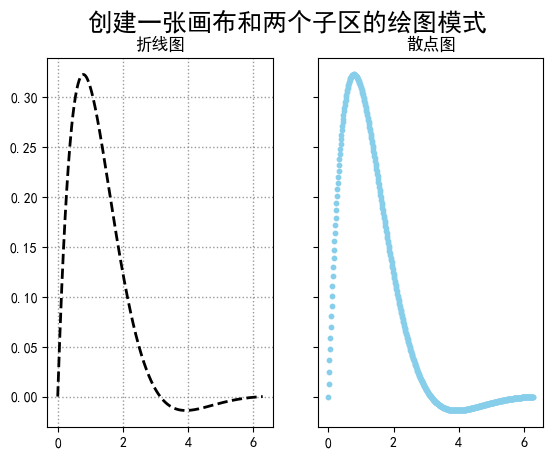

In [10]:
font_style = dict(fontsize=18, weight="black")
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x)

fig, ax = plt.subplots(1, 2, sharey=True)
# subplot(121)
ax1 = ax[0]
ax1.plot(x, y, "k--", lw=2)
ax1.set_title("折线图")
ax1.grid(ls=":", lw=1, color="gray", alpha=0.8)
# subplot(122)
ax2 = ax[1]
ax2.scatter(x, y, s=10, c="skyblue", marker="o")
ax2.set_title("散点图")
# Create a figure title
plt.suptitle("创建一张画布和两个子区的绘图模式", **font_style)
plt.show()

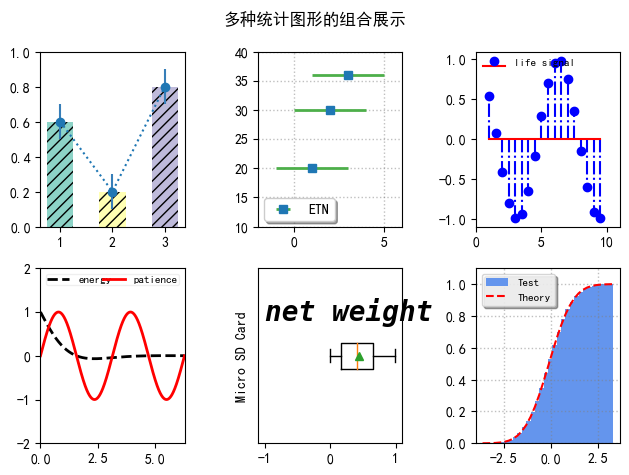

In [11]:
fig, ax = plt.subplots(2, 3)
# subplot(231)
colors = ["#8dd3c7", "#ffffb3", "#bebada"]
ax[0, 0].bar(
    [1, 2, 3], [0.6, 0.2, 0.8], color=colors, width=0.5, hatch="///", align="center"
)
ax[0, 0].errorbar(
    [1, 2, 3], [0.6, 0.2, 0.8], yerr=0.1, capsize=0, ecolor="#377eb8", fmt="o:"
)
ax[0, 0].set_ylim(0, 1.0)

# 使用关键字参数 ecolor 和 elinewidth
# 调整了误差棒的颜色和线宽
ax[0, 1].errorbar(
    [1, 2, 3],
    [20, 30, 36],
    xerr=2,
    ecolor="#4daf4a",
    elinewidth=2,
    fmt="s",
    label="ETN",
)
# 助关键字参数 borderaxespad 将图例与
# 坐标轴的空白距离进行调整
ax[0, 1].legend(loc=3, fancybox=True, shadow=True, fontsize=10, borderaxespad=0.4)
ax[0, 1].set_ylim(10, 40)
ax[0, 1].set_xlim(-2, 6)
ax[0, 1].grid(ls=":", lw=1, color="grey", alpha=0.5)

x3 = np.arange(1, 10, 0.5)
y3 = np.cos(x3)
ax[0, 2].stem(x3, y3, basefmt="r-", linefmt="b-.", markerfmt="bo", label="life signal")
# 使用关键字参数 frameon 将图例的边界框去掉
ax[0, 2].legend(loc=2, fontsize=8, frameon=False, borderpad=0.0, borderaxespad=0.6)
ax[0, 2].set_xlim(0, 11)
ax[0, 2].set_ylim(-1.1, 1.1)

x4 = np.linspace(0, 2 * np.pi, 500)
x4_1 = np.linspace(0, 2 * np.pi, 1000)
y4 = np.cos(x4) * np.exp(-x4)
y4_1 = np.sin(2 * x4_1)
# 这个画图很有意思，同时绘制两条折线图
(
    line1,
    line2,
) = ax[
    1, 0
].plot(x4, y4, "k--", x4_1, y4_1, "r-", lw=2)
# 使用关键字参数 mode 将图例中的条
# 目文本并排水平放置。
ax[1, 0].legend(
    (line1, line2),
    ("energy", "patience"),
    loc="upper center",
    fontsize=8,
    ncol=2,
    framealpha=0.3,
    mode="expand",
    columnspacing=2,
    borderpad=0.1,
)
ax[1, 0].set_ylim(-2, 2)
ax[1, 0].set_xlim(0, 2 * np.pi)

x5 = np.random.rand(100)
ax[1, 1].boxplot(x5, vert=False, showmeans=True, meanprops=dict(color="g"))
ax[1, 1].set_yticks([])
ax[1, 1].set_xlim(-1.1, 1.1)
ax[1, 1].set_ylabel("Micro SD Card")
ax[1, 1].text(
    -1.0,
    1.2,
    "net weight",
    fontsize=20,
    style="italic",
    weight="black",
    family="monospace",
)
mu = 0.0
sigma = 1.0
x6 = np.random.randn(10000)
n, bins, patches = ax[1, 2].hist(
    x6,
    bins=30,
    histtype="stepfilled",
    cumulative=True,
    density=True,
    color="cornflowerblue",
    label="Test",
)
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu)) ** 2)
y = y.cumsum()
y /= y[-1]
ax[1, 2].plot(bins, y, "r--", linewidth=1.5, label="Theory")
ax[1, 2].set_ylim(0.0, 1.1)
ax[1, 2].grid(ls=":", lw=1, color="grey", alpha=0.5)
ax[1, 2].legend(
    loc="upper left", fontsize=8, shadow=True, fancybox=True, framealpha=0.8
)
plt.suptitle("多种统计图形的组合展示")
# plt.subplots_adjust()
plt.tight_layout()
plt.show()